In [1]:
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.datasets import fashion_mnist
import numpy as np
import pandas as pd

Попробуйте обучить, нейронную сеть на Keras (рассмотренную на уроке) на датасете MNIST с другими параметрами. Напишите в комментарии к уроку:
* Какого результата вы добились от нейросети?
* Что помогло вам улучшить её точность?
* Поработайте с документацией Keras. Попробуйте найти полезные команды Keras, неразобранные на уроке.

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Class 6


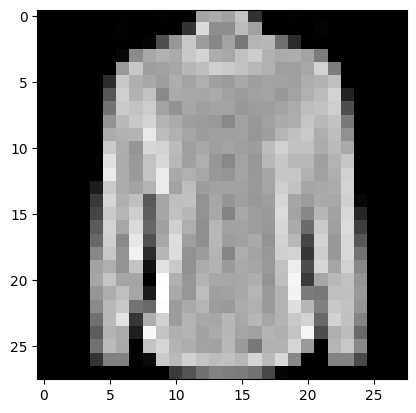

In [3]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Class {y_train[ind]}')

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

* Датасет представлен 60 тыс трейновых данных пиксельных рисунков одежды, размером 28х28 пикселей и 10 тыс тестовых данных того же типа.
* y_train, y_test являются метками класса одежды

* 0 - футболки
* 1 - Брюки
* 2 - Пуловеры
* 3 - Платья
* 4 - Пальто
* 5 - Сандали
* 6 - Рубашки
* 7 - Кроссовки
* 8 - Сумки
* 9 - Ботинки

Пред обучением модели произведёт стандартизацию признаков - разброс значений будет от 0 до 1

In [5]:
# Стандартизация
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [6]:
# Формирования вектора признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [7]:
# изменение формата метки класса
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

* Подберём число параметров при котором качество модели будет максимальным 
* Количество нейронов для многослойной полносвязной нейросети с 1 скрытым слоем

In [23]:
neurons_list = [16, 32, 64, 84, 100, 128, 150, 200, 250, 300]
train_acc_list = []
val_acc_list = []

for i in neurons_list:
    
    model = Sequential([
        Dense(i, input_shape=(28 * 28,), activation='relu'),
        Dense(10, activation='sigmoid')
    ])
    
    model.summary()
    
    # Компиляция модели
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train,
        epochs=5,
        batch_size=64,
        verbose=1,
        validation_data=(X_test, y_test)
    )

    train_acc_list.append(np.max(history.history['accuracy']))
    val_acc_list.append(np.max(history.history['val_accuracy']))
    

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 16)                12560     
                                                                 
 dense_27 (Dense)            (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 0.6764 - accuracy: 0.7708 - val_loss: 0.5087 - val_accuracy: 0.8253
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4610 - accuracy: 0.8407 - val_loss: 0.4744 - val_accuracy: 0.8287
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4296 - accuracy: 0.8504 - val_loss: 0.4456 - val_accuracy: 0.8444
Epoch 4/5
938/938 [===

Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: 0.3040 - accuracy: 0.8890 - val_loss: 0.3619 - val_accuracy: 0.8687
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 150)               117750    
                                                                 
 dense_39 (Dense)            (None, 10)                1510      
                                                                 
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.5169 - accuracy: 0.8203 - val_loss: 0.4749 - val_accuracy: 0.8350
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.3826 - accuracy: 0.8643 - val_loss: 0.3947 - val_accuracy: 0.8567
Epoch 3/5
938/938 [=

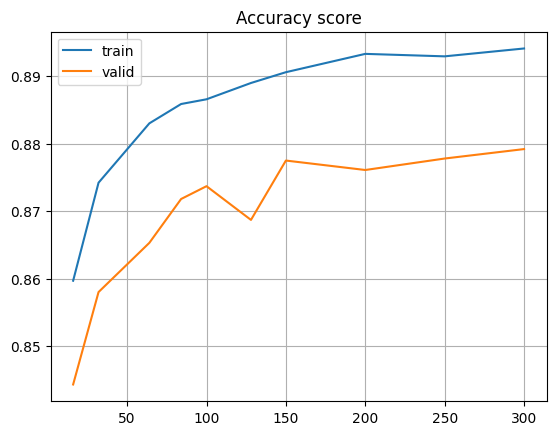

In [24]:
plt.plot(neurons_list, train_acc_list, label = 'train')
plt.plot(neurons_list, val_acc_list, label = 'valid')
plt.legend()
plt.title('Accuracy score')
plt.grid()
plt.show()

* При числе нейронов скрытого слоя, равном 300 и количестве настраиваемых параметров, равном 238 тыс достигнуты максимальные показатели метрики как на обучающей так и на валидационной выборках
* Подберём оптимальное количество скрытых слоёв для этого числа нейронов и параметров

In [95]:
layer_list = np.arange(1, 11, 1)
train_acc_list = []
val_acc_list = []

# один слой
model = Sequential([
    Dense(300, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
    epochs=5,
    batch_size=64,
    verbose=1,
    validation_data=(X_test, y_test)
)

train_acc_list.append(np.max(history.history['accuracy']))
val_acc_list.append(np.max(history.history['val_accuracy']))

# два слоя
model = Sequential([
    Dense(250, input_shape=(28 * 28,), activation='relu'),
    Dense(160, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
    epochs=5,
    batch_size=64,
    verbose=1,
    validation_data=(X_test, y_test)
)

train_acc_list.append(np.max(history.history['accuracy']))
val_acc_list.append(np.max(history.history['val_accuracy']))

# три слоя
model = Sequential([
    Dense(220, input_shape=(28 * 28,), activation='relu'),
    Dense(165, activation='relu'),
    Dense(165, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
    epochs=5,
    batch_size=64,
    verbose=1,
    validation_data=(X_test, y_test)
)

train_acc_list.append(np.max(history.history['accuracy']))
val_acc_list.append(np.max(history.history['val_accuracy']))

# четыре слоя
model = Sequential([
    Dense(191, input_shape=(28 * 28,), activation='relu'),
    Dense(165, activation='relu'),
    Dense(165, activation='relu'),
    Dense(165, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
    epochs=5,
    batch_size=64,
    verbose=1,
    validation_data=(X_test, y_test)
)

train_acc_list.append(np.max(history.history['accuracy']))
val_acc_list.append(np.max(history.history['val_accuracy']))

# пять слоёв
model = Sequential([
    Dense(181, input_shape=(28 * 28,), activation='relu'),
    Dense(150, activation='relu'),
    Dense(150, activation='relu'),
    Dense(150, activation='relu'),
    Dense(150, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
    epochs=5,
    batch_size=64,
    verbose=1,
    validation_data=(X_test, y_test)
)

train_acc_list.append(np.max(history.history['accuracy']))
val_acc_list.append(np.max(history.history['val_accuracy']))

# шесть слоёв
model = Sequential([
    Dense(157, input_shape=(28 * 28,), activation='relu'),
    Dense(150, activation='relu'),
    Dense(150, activation='relu'),
    Dense(150, activation='relu'),
    Dense(150, activation='relu'),
    Dense(145, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
    epochs=5,
    batch_size=64,
    verbose=1,
    validation_data=(X_test, y_test)
)

train_acc_list.append(np.max(history.history['accuracy']))
val_acc_list.append(np.max(history.history['val_accuracy']))

# семь слоёв
model = Sequential([
    Dense(157, input_shape=(28 * 28,), activation='relu'),
    Dense(140, activation='relu'),
    Dense(140, activation='relu'),
    Dense(140, activation='relu'),
    Dense(140, activation='relu'),
    Dense(135, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
    epochs=5,
    batch_size=64,
    verbose=1,
    validation_data=(X_test, y_test)
)

train_acc_list.append(np.max(history.history['accuracy']))
val_acc_list.append(np.max(history.history['val_accuracy']))

# восемь слоёв
model = Sequential([
    Dense(141, input_shape=(28 * 28,), activation='relu'),
    Dense(140, activation='relu'),
    Dense(140, activation='relu'),
    Dense(140, activation='relu'),
    Dense(140, activation='relu'),
    Dense(135, activation='relu'),
    Dense(120, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
    epochs=5,
    batch_size=64,
    verbose=1,
    validation_data=(X_test, y_test)
)

train_acc_list.append(np.max(history.history['accuracy']))
val_acc_list.append(np.max(history.history['val_accuracy']))

# девять слоёв
model = Sequential([
    Dense(150, input_shape=(28 * 28,), activation='relu'),
    Dense(125, activation='relu'),
    Dense(125, activation='relu'),
    Dense(125, activation='relu'),
    Dense(125, activation='relu'),
    Dense(125, activation='relu'),
    Dense(115, activation='relu'),
    Dense(110, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
    epochs=5,
    batch_size=64,
    verbose=1,
    validation_data=(X_test, y_test)
)

train_acc_list.append(np.max(history.history['accuracy']))
val_acc_list.append(np.max(history.history['val_accuracy']))

# десять слоёв
model = Sequential([
    Dense(147, input_shape=(28 * 28,), activation='relu'),
    Dense(120, activation='relu'),
    Dense(120, activation='relu'),
    Dense(120, activation='relu'),
    Dense(120, activation='relu'),
    Dense(120, activation='relu'),
    Dense(110, activation='relu'),
    Dense(110, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
    epochs=5,
    batch_size=64,
    verbose=1,
    validation_data=(X_test, y_test)
)

train_acc_list.append(np.max(history.history['accuracy']))
val_acc_list.append(np.max(history.history['val_accuracy']))

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_408 (Dense)           (None, 300)               235500    
                                                                 
 dense_409 (Dense)           (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 13s 13ms/step - loss: 0.4992 - accuracy: 0.8245 - val_loss: 0.4182 - val_accuracy: 0.8545
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: 0.3709 - accuracy: 0.8671 - val_loss: 0.4023 - val_accuracy: 0.8578
Epoch 3/5
938/938 [==============================] - 13s 14ms/step - loss: 0.3330 - accuracy: 0.8788 - val_loss: 0.4048 - val_accuracy: 0.8518
Epoch 4/5
938/

Epoch 5/5
938/938 [==============================] - 11s 12ms/step - loss: 0.2967 - accuracy: 0.8894 - val_loss: 0.3915 - val_accuracy: 0.8604
Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_428 (Dense)           (None, 157)               123245    
                                                                 
 dense_429 (Dense)           (None, 150)               23700     
                                                                 
 dense_430 (Dense)           (None, 150)               22650     
                                                                 
 dense_431 (Dense)           (None, 150)               22650     
                                                                 
 dense_432 (Dense)           (None, 150)               22650     
                                                                 
 dense_433 (Dense)           (None, 145)  

                                                                 
Total params: 238,985
Trainable params: 238,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 16s 15ms/step - loss: 0.5641 - accuracy: 0.7921 - val_loss: 0.4567 - val_accuracy: 0.8366
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 0.3987 - accuracy: 0.8552 - val_loss: 0.3976 - val_accuracy: 0.8533
Epoch 3/5
938/938 [==============================] - 13s 14ms/step - loss: 0.3577 - accuracy: 0.8707 - val_loss: 0.3877 - val_accuracy: 0.8601
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: 0.3350 - accuracy: 0.8797 - val_loss: 0.3702 - val_accuracy: 0.8718
Epoch 5/5
938/938 [==============================] - 13s 14ms/step - loss: 0.3205 - accuracy: 0.8843 - val_loss: 0.3590 - val_accuracy: 0.8732
Model: "sequential_84"
__________________________________________________________

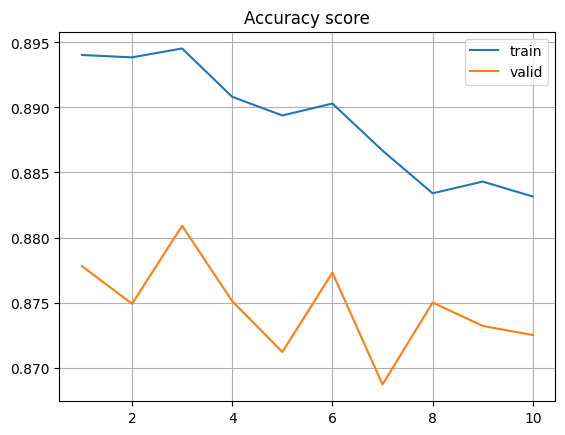

In [96]:
plt.plot(layer_list, train_acc_list, label = 'train')
plt.plot(layer_list, val_acc_list, label = 'valid')
plt.legend()
plt.xlable('Layers')
plt.ylable('Accuracy')
plt.title('Accuracy score')
plt.grid()
plt.show()

В случае 3х скрытых слоёв модель показывает наилучшие результаты на трейне и тесте

In [97]:
batch_list = [84, 100, 150, 200, 250, 300]
train_acc_list = []
val_acc_list = []

for i in batch_list:
    model = Sequential([
        Dense(220, input_shape=(28 * 28,), activation='relu'),
        Dense(165, activation='relu'),
        Dense(165, activation='relu'),
        Dense(10, activation='sigmoid')
    ])

    model.summary()

    # Компиляция модели
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train,
        epochs=5,
        batch_size=i,
        verbose=1,
        validation_data=(X_test, y_test)
    )
    
    train_acc_list.append(np.max(history.history['accuracy']))
    val_acc_list.append(np.max(history.history['val_accuracy']))

Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_473 (Dense)           (None, 220)               172700    
                                                                 
 dense_474 (Dense)           (None, 165)               36465     
                                                                 
 dense_475 (Dense)           (None, 165)               27390     
                                                                 
 dense_476 (Dense)           (None, 10)                1660      
                                                                 
Total params: 238,215
Trainable params: 238,215
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
715/715 [==============================] - 12s 15ms/step - loss: 0.4890 - accuracy: 0.8245 - val_loss: 0.4420 - val_accuracy: 0.8372
Epoch 2/5
715/715 [=================

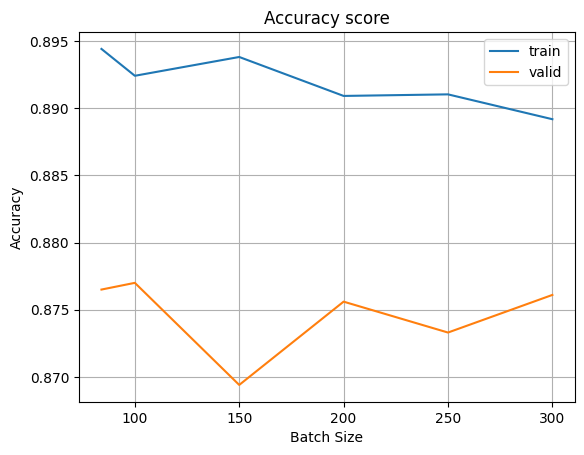

In [99]:
plt.plot(batch_list, train_acc_list, label = 'train')
plt.plot(batch_list, val_acc_list, label = 'valid')
plt.legend()
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.title('Accuracy score')
plt.grid()
plt.show()

* При наименьшем значении батча модель показывает максимальные результаты
* Подберём количество эпох для обучения

In [100]:
epoch_list = np.arange(1, 11, 1)
train_acc_list = []
val_acc_list = []

for i in epoch_list:
    model = Sequential([
        Dense(220, input_shape=(28 * 28,), activation='relu'),
        Dense(165, activation='relu'),
        Dense(165, activation='relu'),
        Dense(10, activation='sigmoid')
    ])

    model.summary()

    # Компиляция модели
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train,
        epochs=i,
        batch_size=64,
        verbose=1,
        validation_data=(X_test, y_test)
    )
    
    train_acc_list.append(np.max(history.history['accuracy']))
    val_acc_list.append(np.max(history.history['val_accuracy']))

Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_497 (Dense)           (None, 220)               172700    
                                                                 
 dense_498 (Dense)           (None, 165)               36465     
                                                                 
 dense_499 (Dense)           (None, 165)               27390     
                                                                 
 dense_500 (Dense)           (None, 10)                1660      
                                                                 
Total params: 238,215
Trainable params: 238,215
Non-trainable params: 0
_________________________________________________________________
938/938 [==============================] - 13s 12ms/step - loss: 0.4895 - accuracy: 0.8241 - val_loss: 0.4038 - val_accuracy: 0.8534
Model: "sequential_92"
_______________________

Epoch 4/10
938/938 [==============================] - 11s 12ms/step - loss: 0.3010 - accuracy: 0.8878 - val_loss: 0.3365 - val_accuracy: 0.8778
Epoch 5/10
938/938 [==============================] - 11s 12ms/step - loss: 0.2850 - accuracy: 0.8935 - val_loss: 0.3732 - val_accuracy: 0.8709
Epoch 6/10
938/938 [==============================] - 12s 12ms/step - loss: 0.2684 - accuracy: 0.9001 - val_loss: 0.3583 - val_accuracy: 0.8711
Epoch 7/10
938/938 [==============================] - 11s 12ms/step - loss: 0.2568 - accuracy: 0.9027 - val_loss: 0.3479 - val_accuracy: 0.8812
Epoch 8/10
938/938 [==============================] - 12s 12ms/step - loss: 0.2493 - accuracy: 0.9056 - val_loss: 0.3150 - val_accuracy: 0.8868
Epoch 9/10
938/938 [==============================] - 12s 12ms/step - loss: 0.2350 - accuracy: 0.9107 - val_loss: 0.3391 - val_accuracy: 0.8875
Epoch 10/10
938/938 [==============================] - 12s 12ms/step - loss: 0.2243 - accuracy: 0.9154 - val_loss: 0.3275 - val_accuracy

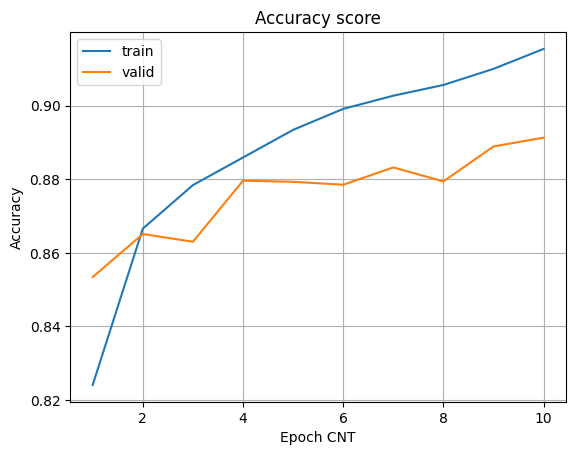

In [103]:
plt.plot(epoch_list, train_acc_list, label = 'train')
plt.plot(epoch_list, val_acc_list, label = 'valid')
plt.legend()
plt.xlabel('Epoch CNT')
plt.ylabel('Accuracy')
plt.title('Accuracy score')
plt.grid()
plt.show()

* Наблюдается рост значения метрик для обеих выборок, вероятно выходящее за интервал исследуемого количества эпох
* Попробуем увеличить количество эпох до 20

In [104]:
model = Sequential([
    Dense(220, input_shape=(28 * 28,), activation='relu'),
    Dense(165, activation='relu'),
    Dense(165, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
    epochs=20,
    batch_size=64,
    verbose=1,
    validation_data=(X_test, y_test)
)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']    

Model: "sequential_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_537 (Dense)           (None, 220)               172700    
                                                                 
 dense_538 (Dense)           (None, 165)               36465     
                                                                 
 dense_539 (Dense)           (None, 165)               27390     
                                                                 
 dense_540 (Dense)           (None, 10)                1660      
                                                                 
Total params: 238,215
Trainable params: 238,215
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
938/938 [==============================] - 14s 13ms/step - loss: 0.4923 - accuracy: 0.8231 - val_loss: 0.4330 - val_accuracy: 0.8445
Epoch 2/20
938/938 [==============

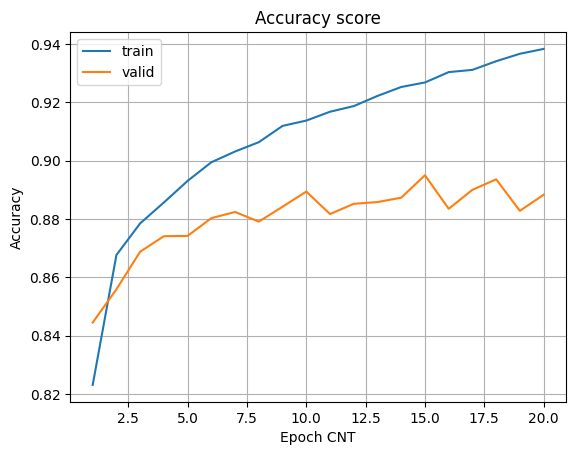

In [118]:
plt.plot(np.arange(1, len(history.history['accuracy'])+1, 1), train_acc, label = 'train')
plt.plot(np.arange(1, len(history.history['accuracy'])+1, 1), val_acc, label = 'valid')
plt.legend()
plt.xlabel('Epoch CNT')
plt.ylabel('Accuracy')
plt.title('Accuracy score')
plt.grid()
plt.show()

In [126]:
f"Наилучшее значение Accuracy на трейне {round(history.history['accuracy'][14], 2)}, на тесте {round(history.history['val_accuracy'][14], 2)}, при количестве эпох - 15"

'Наилучшее значение Accuracy на трейне 0.93, на тесте 0.89, при количестве эпох - 15'

* Наилучшие показатели метрики достигнуты на 15 эпохах полносвязной многослойной нейронной сети с тремя скрытыми слоями, 238 тыс. настраиваемых параметрах и размером батча в 64. 
* Далее, при большем значении эпох, метрика на тесте падает а на трейне продолжает увеличиваться что говорит об переобучении модели